# Twitch Stream Engagement Visualization Based on Comment Body

## Data Preparation

In [8]:
import pandas as pd

In [9]:
streamer_id = 'giantwaffle'
stream_id = '257297169'

In [10]:
df = pd.read_pickle('data/ICWSM19_data/' + streamer_id + '.pkl')

In [11]:
filt = (df['video_id'] == stream_id)

In [12]:
df_filtered = df[filt].copy()

In [13]:
df_filtered['created_at'] = df_filtered['created_at'].apply(pd.to_datetime)

In [14]:
df_comment_body = df_filtered.groupby(pd.Grouper(key='created_at', freq='60S'))['body'].apply(' '.join).to_frame('comment_body')
df_comment_freq = df_filtered.groupby(pd.Grouper(key='created_at', freq='60S')).size().to_frame(name='comment_freq')

In [16]:
df_sentiment = pd.merge(df_comment_body, df_comment_freq, on="created_at", how="left")
df_sentiment = df_sentiment.reset_index()
df_sentiment.sort_values(by=['comment_freq'], ascending=False).head()

,created_at,comment_body,comment_freq
666,2018-05-04 04:37:00+00:00,proxTOASTY why is he freking out AHHHHHHHHHHH ...,211
665,2018-05-04 04:36:00+00:00,LUL LUL LUL range setting not level just overd...,197
588,2018-05-04 03:19:00+00:00,lirikOBESE lirikOBESE lirikOBESE lirikOBESE da...,195
661,2018-05-04 04:32:00+00:00,POGGERS danP EXECUTE HER 😡 @giantwaffle remind...,177
668,2018-05-04 04:39:00+00:00,trumps america Kappa LOL LUL LUL FAKE NEWS Cla...,168


In [17]:
df_sentiment['comment_body'] = df_sentiment['comment_body'].astype('string')
df_sentiment.dtypes

created_at      datetime64[ns, UTC]
comment_body                 string
comment_freq                  int64
dtype: object

## Data Visualization

In [23]:
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from matplotlib import rcParams

In [29]:
most_comments_index = 666

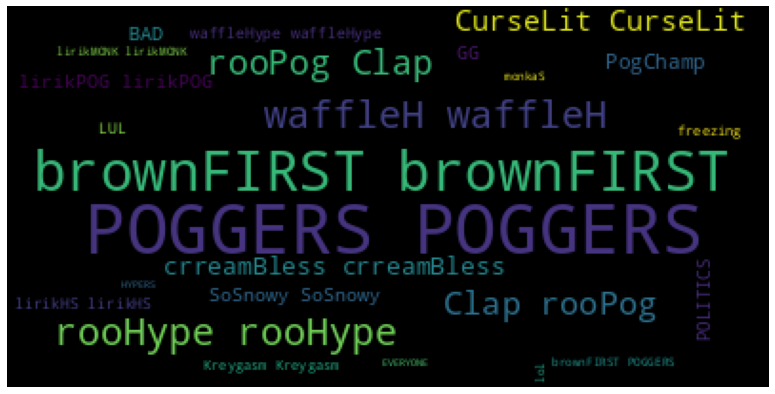

In [33]:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
wordcloud = WordCloud(stopwords=stopwords,max_words=25,background_color="black").generate(df_sentiment.iloc[most_comments_index, 1])

rcParams["figure.figsize"] = (14,7)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Poggers

A twitch emote typically used to express enthusiasm, enthrawlment or other sophisticated emotions of happiness and dopamine.

https://www.urbandictionary.com/define.php?term=poggers